dataset和dataloader
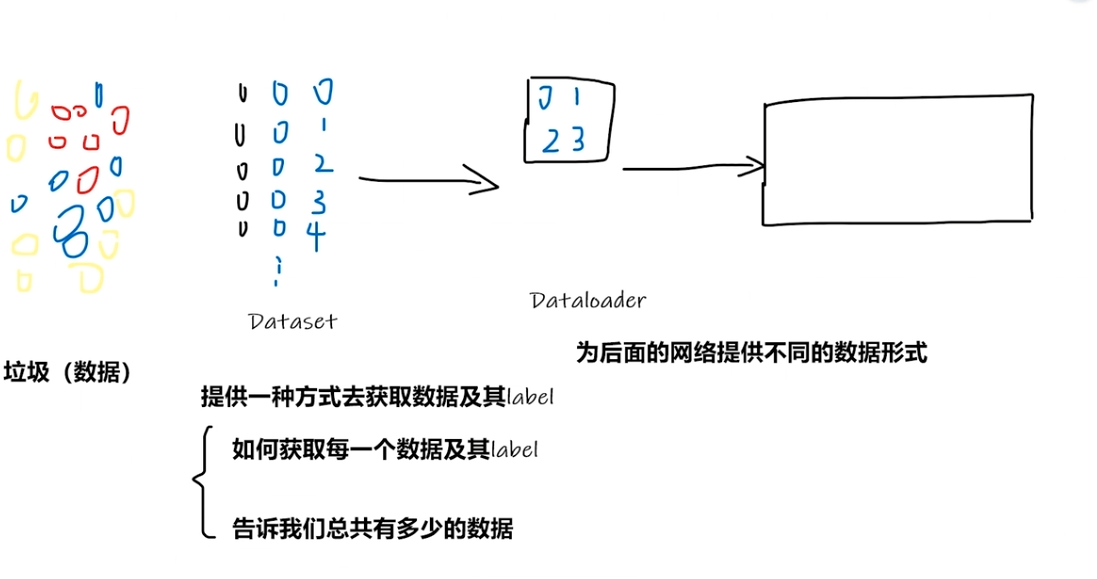

In [4]:
from torch.utils.data import Dataset
from PIL import Image
import os

In [5]:
#草稿
#img_path="E:\\深度学习\\小土堆\\数据集\\hymenoptera_data\\train\\ants\\0013035.jpg"
#img=Image.open(img_path)
#img.show()


In [6]:
#草稿
#dir_path="E:\深度学习\\小土堆\\数据集\\hymenoptera_data\\train\\ants"
#img_path_list=os.listdir(dir_path)
#img_path_list[0]


In [7]:
#root_dir="E:\深度学习\\小土堆\\数据集\\hymenoptera_data\\train"
#label_dir="ants"
#path=os.path.join(root_dir,label_dir)
#path

In [8]:
class mydataset(Dataset):#self相当于指定类的全局变量
    def __init__(self,root_dir,label_dir):
        self.root_dir=root_dir
        self.label_dir=label_dir
        self.path=os.path.join(self.root_dir,self.label_dir)
        self.img_path_list=os.listdir(self.path)   

    def __getitem__(self,idx):
        img_name=self.img_path_list[idx]
        img_path=os.path.join(self.root_dir,self.label_dir,img_name)
        img=Image.open(img_path)
        label=self.label_dir
        return img,label

    def __len__(self):
        return len(self.img_path_list)



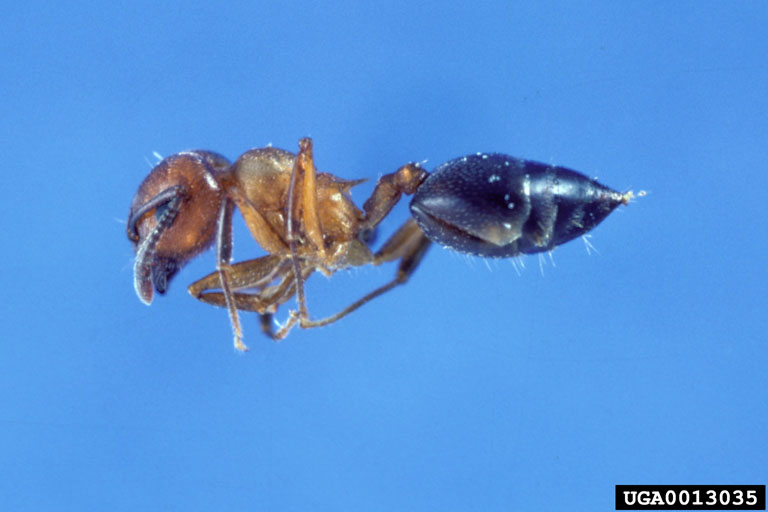

In [9]:
root_dir="E:\深度学习\\小土堆\\数据集\\hymenoptera_data\\train"
ants_label_dir="ants"
ants_dataset=mydataset(root_dir,ants_label_dir)
ants_dataset[0]
img,label=ants_dataset[0]
img


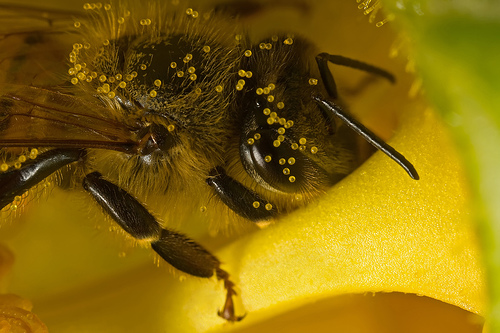

In [10]:
bees_label_dir="bees"
bees_dataset=mydataset(root_dir,bees_label_dir)
bees_dataset[0]
img,lable=bees_dataset[0]
img


In [11]:
train_dataset=ants_dataset+bees_dataset
len(train_dataset)


245

In [12]:
len(ants_dataset)

124

In [13]:
len(bees_dataset)

121

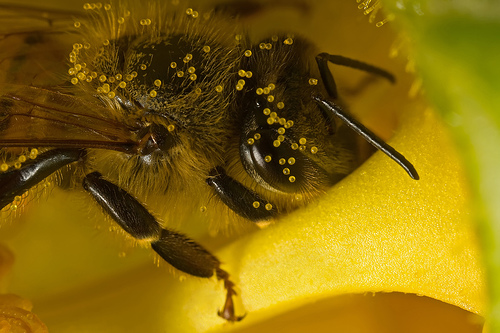

In [14]:
img,label=train_dataset[124]
img


In [15]:
# import os
# root_dir = '数据集/train'        # 设置根目录路径
# target_dir = 'ants_image'            # 图像文件夹名称
# img_path = os.listdir(os.path.join(root_dir, target_dir))  # 获取所有图像文件列表
# label = target_dir.split('_')[0]     # 从文件夹名提取标签 'ants'
# out_dir = 'ants_label'               # 标签文件输出目录

# for i in img_path:                   # 遍历每个图像文件
#     file_name = i.split('.jpg')[0]   # 去掉.jpg扩展名，获取文件名
#     with open(os.path.join(root_dir, out_dir,"{}.txt".format(file_name)),'w') as f:
#         f.write(label)                # 将标签写入对应的txt文件

# 这段代码的作用是：

# 读取图像目录：从 练手数据集/train/ants_image 目录中获取所有图像文件
# 提取标签：从目录名 ants_image 中提取类别标签 ants
# 创建标签文件：为每个图像文件创建一个同名的 .txt 标签文件
# 保存标签：将标签 ants 写入每个文本文件中


In [16]:
class MyDataset(Dataset):
    def __init__(self, root_dir, image_dir, label_dir):
        """
        root_dir: 根目录路径 (如 '练手数据集/train')
        image_dir: 图像文件夹名 (如 'ants_image' 或 'bees_image')
        label_dir: 标签文件夹名 (如 'ants_label' 或 'bees_label')
        """
        self.root_dir = root_dir
        self.image_dir = image_dir
        self.label_dir = label_dir
        
        # 图像和标签的完整路径
        self.image_path = os.path.join(self.root_dir, self.image_dir)
        self.label_path = os.path.join(self.root_dir, self.label_dir)
        
        # 获取所有图像文件列表
        self.img_list = os.listdir(self.image_path)
        
    def __getitem__(self, idx):
        # 获取图像文件名
        img_name = self.img_list[idx]
        img_item_path = os.path.join(self.image_path, img_name)
        
        # 读取图像
        img = Image.open(img_item_path)
        
        # 获取对应的标签文件名 (将.jpg替换为.txt)
        txt_name = img_name.replace('.jpg', '.txt')
        label_item_path = os.path.join(self.label_path, txt_name)
        
        # 读取标签
        with open(label_item_path, 'r') as f:
            label = f.read().strip()  # 读取标签内容并去除空白字符
            
        return img, label
    
    def __len__(self):
        return len(self.img_list)

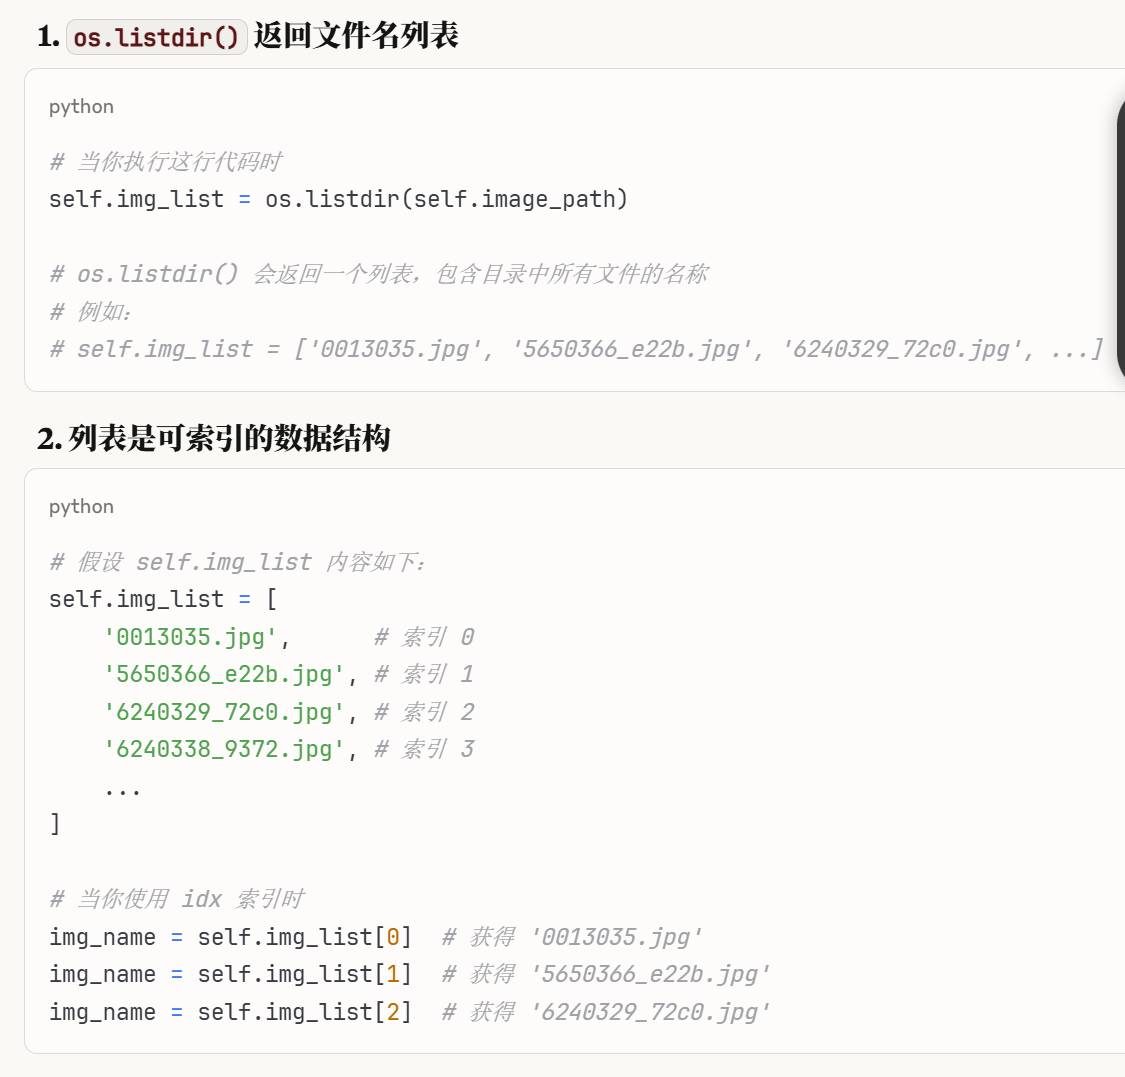

In [17]:
# 创建蚂蚁数据集
ants_dataset = MyDataset(
    root_dir='数据集/train',
    image_dir='ants_image',
    label_dir='ants_label'
)

# 创建蜜蜂数据集
bees_dataset = MyDataset(
    root_dir='数据集/train',
    image_dir='bees_image',
    label_dir='bees_label'
)

# # 如果想合并两个数据集
# from torch.utils.data import ConcatDataset
# full_dataset = ConcatDataset([ants_dataset, bees_dataset])

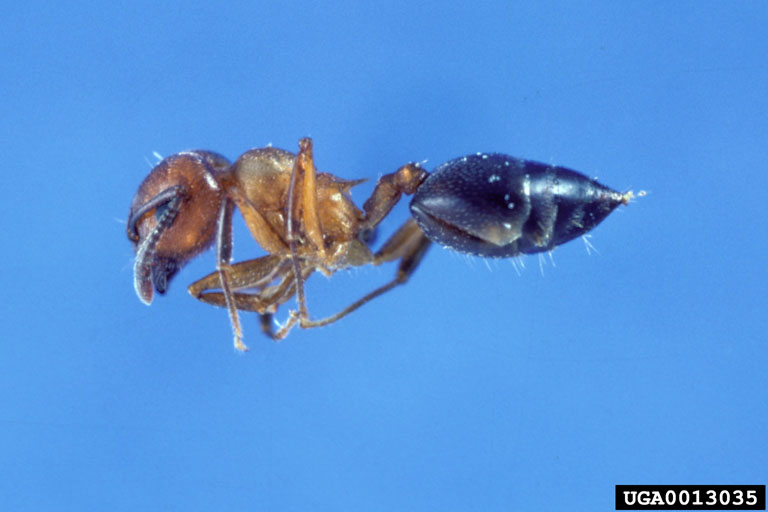

In [18]:
img, label = ants_dataset[0]
img


In [21]:
label=ants_dataset[0][1]
label

'ants'

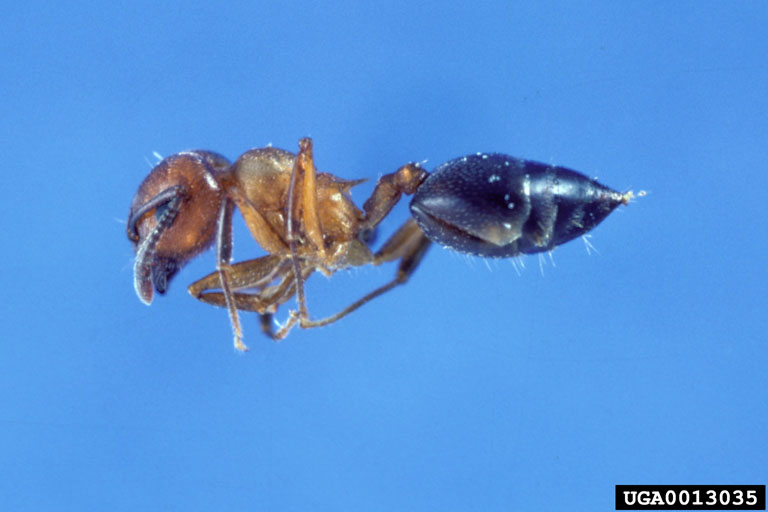

In [22]:
img=ants_dataset[0][0]
img